
# Twitter Sentiment Analysis using Python
Class: CIS 024C
Student: Minhdang Doan

Sentiment can be known as attitudes, emotions or option of people about the events or topics. Sentiment Analysis is a method to determine people thinking that are possitive, negative, or neutral on the particular topics.It can be used in many fields such as business,politics, social media,..etc..

Twitter is one of the popular social media that people follow a lots.They post their own topic, share people writing, like/dislike, give personal opitions, ....etc. We can seperate those things into 3 categories: positive, neutural, and negative.

We can use python program to analyze twitter sentiment by the following steps:
1.Ask the user enter the person name or event that they want to search on twitter
2.Extract twitter data
2.Process sentiment analysis
3.Ouput the result.Calculate percentage of possitive, negative and neutural of the tweet.Print out the first 5 of possitive, negative, and neutral tweets.

Donald Trump and bitcoin are hot topics recently. This python program will access twitter, grab the data and analyze it. 


 

Enter query to search:  bitcoin
Positive tweets percentage: 43 %
Negative tweets percentage: 11 %
Neutral tweets percentage: 45 %         


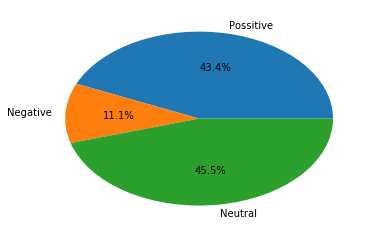



Positive tweets:
#Bitcoin #News: "Cheated Cryptocurrency Investors Are Taking Matters Into Their Own Hands" https://t.co/cdQcXyigdK
RT @RandyHilarski: What a Great Altcoin Run It Has Been. The Rubberband effect  in action.
https://t.co/mny4l219rI
#Bitcoin #Altcoins #Cryp…
#Bitcoin #News: "4x NEW Bitmain Antminer S9 14TH/s Bitcoin/Cash Miner with 2x APW3+" https://t.co/JQVGNYLdUp
RT @CryptoHustle: "Nowhere has this confusion been more pronounced than with #Bcash, a cryptocurrency claiming to be “the real Bitcoin” and…
What percentage of Bitcoin owners think Bitcoin mining looks like this? After all it looks like gold coins right? https://t.co/enUeraWRgT


Negative tweets:
What will destroy #Bitcoin? Governments? Hackers? Winklevoss twins?
Usability. Here’s why: https://t.co/lIf2P31rYQ… https://t.co/XltTJF86Tw
RT @lightning: Don't like what that other network has been saying about bitcoin?🤔

Have no fear, we'll be on Bloomberg TV at 4:40pm ET toda…
@TradeFlags @PeterLBrandt @ritholtz @

In [3]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt
 
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens to ecess Twitter
    
        consumer_key = 'jFFXK9nETAXHTzqUjgmRApeU3' 
        consumer_secret = '0HU3JDexAQj12vlcFEqIzhvhAgg7JVH7wVwCImmE8eldpyZZNK' 
        access_token = '933423695405596672-JT9hiq4PUsFQxzUsIOIWqWSPMR7a0j3' 
        access_token_secret = 'KS20bUPkA3ZIbpQaP245BTAeyerBBgqkhPDOm6s5tTA6o'   
    
    
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) \
                                    |(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
 
def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    #Ask user to enter the search
    query = raw_input("Enter query to search:  ")
    # calling function to get tweets
    tweets = api.get_tweets(query, count = 200)
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print ("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
     
    # picking neutral tweets from tweets
    neutralTweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']    
    
    
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} % \
        ".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))
    
    
   # get the numbers for the chart 

    pecentageTweet =[]
    
    percentPosTweet =float( "{} \
        ".format(100*len(ptweets)/len(tweets)))
    pecentageTweet.append (percentPosTweet)
    
    percentNegTweet =float( "{} \
        ".format(100*len(ntweets)/len(tweets)))   
    pecentageTweet.append (percentNegTweet)
    
    percentNeuTweet =float( "{} \
        ".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))
    pecentageTweet.append (percentNeuTweet)
    
    #print the pie chart
    sentiment = ["Possitive","Negative","Neutral"]

    plt.pie(pecentageTweet,labels =sentiment,autopct ="%1.1f%%")

    plt.show()

 
    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:5]:
        print(tweet['text'])
 
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:5]:
        print(tweet['text'])

    # printing first 5 neutral tweets
    print("\n\nNeutral tweets:")
    for tweet in neutralTweets[:5]:
        print(tweet['text'])        
        
        
 
#if __name__ == "__main__":
    # calling main function
main()


# output Donald Trump search

Enter query to search:  donald trump
Positive tweets percentage: 41 %
Negative tweets percentage: 17 %
Neutral tweets percentage: 41 %         



Positive tweets:
RT @ThePlumLineGS: House Democrats are preparing for possible impeachment of Donald Trump, should they regain the majority.

Good. That's e…
RT @JohnTDolan: Donald Trump isn't just making America great again, he is providing a future for the next generation.  "Democrat Resistance…
RT @JoyAnnReid: Nikki Haley just threatened the nations of the world on behalf of Trump to try and strong arm them not to condemn our Israe…
RT @SethHanlon: ICYMI: Foreigners who own U.S. corporate stock get a bigger tax break under this bill than the entire working- and middle c…
RT @Imperator_Rex3: 5. Let's examine how Obama &amp; Clinton, with their cronies, abused power to try &amp; take out an innocent man, Donald J Trum…


Negative tweets:
RT @ProudResister: REAL NEWS
🗞Washington Post
🗞New York Times
🗞CNN &amp; MSNBC
🗞Bloomberg News
🗞USA Today
🗞NBC News
🗞ABC News
🗞CBS News

FAKE N…
RT @The_Trump_Train: OUTRAGEOUS: @tacobell lets employee host anti-Trump event at the restaurant with a Donald Trump Piñata. RETWEET! @sean…
RT @Mike_Press19: Donald J.Trump Refuses to Back Down, Openly Reminds Country That Christmas Is About Jesus &lt; America Fans https://t.co/ODO…


Neutral tweets:
@scottishlabour @LabourRichard - Donald Dewar,"...let consensus trump envy for the benefit of all Scotland.."where's the beef Richard?
RT @sputnik_TR: 'Kudüs oylaması, Trump'ın yardımları kesmek için bahanesi' https://t.co/aCGnDk8NI9 https://t.co/5ENrxpzaLw
Donald Trump is dismantling -EVERYTHING, b/c that is what he was brought in to do. That is his JOB -his purpose as PRESIDENT.
RT @ClintEastwoodLA: Remember when folks hung a picture of #JFK on their wall? 

Today, I put this picture of @realDonaldTrump @POTUS on my…
RT @spanish_btss: ¿Se dan cuenta de que si BTS no existiera, Donald Trump iba a ser la  persona más retwiteada en el 2017? BTS salvando el…